#  EDA & Hypothesis Testing on Huda Beauty Shade Inclusivity


This notebook analyzes whether Huda Beauty’s complexion product lines (foundations, concealers, skin tints) offer inclusive shade ranges across diverse skin tones, using the Fitzpatrick scale as a basis. We use Exploratory Data Analysis (EDA) and statistical hypothesis testing.


## Prediction
This project aimed to predict whether a Huda Beauty foundation shade is inclusive—defined as suitable for Fitzpatrick skin types IV to VI—based on product features such as undertone, product line, and encoded attributes. By framing this as a binary classification task, we trained machine learning models including Random Forest and k-Nearest Neighbors, which achieved high accuracy and F1-scores. The results confirm that inclusivity can be reliably identified using structured product data, highlighting patterns in shade design that correlate with diverse skin tone representation.

In [1]:

from google.colab import files
uploaded = files.upload()


Saving HudaBeautyr_Shades.xlsx to HudaBeautyr_Shades.xlsx


In [2]:

import pandas as pd

df = pd.read_excel('HudaBeautyr_Shades.xlsx')
df.head()


,Product Type,Product Line,Shade Name,Undertone,Skin Tone Description,Fitzpatrick Type,Launch Date,Average Rating,Inclusivity
0,Foundation,#FauxFilter Luminous Matte Foundation,Milkshake 100B,Beige,Ultra fair skin with beige undertones,I,2017-10-13,4.6,Yes
1,Foundation,#FauxFilter Luminous Matte Foundation,Angel Food 110N,Neutral,Ultra fair skin with neutral undertones,I,2017-10-13,4.6,Yes
2,Foundation,#FauxFilter Luminous Matte Foundation,Vanilla 120B,Beige,Fair skin with pinky-beige undertones,II,2017-10-13,4.6,Yes
3,Foundation,#FauxFilter Luminous Matte Foundation,Panna Cotta 130G,Golden,Fair skin with golden undertones,II,2017-10-13,4.6,Yes
4,Foundation,#FauxFilter Luminous Matte Foundation,Cashew 140G,Golden,Fair skin with peachy-golden undertones,II,2017-10-13,4.6,Yes


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Type           166 non-null    object 
 1   Product Line           166 non-null    object 
 2   Shade Name             166 non-null    object 
 3   Undertone              166 non-null    object 
 4   Skin Tone Description  166 non-null    object 
 5   Fitzpatrick Type       166 non-null    object 
 6   Launch Date            166 non-null    object 
 7   Average Rating         166 non-null    float64
 8   Inclusivity            166 non-null    object 
dtypes: float64(1), object(8)
memory usage: 11.8+ KB


In [4]:

df.describe()


df.describe(include=['object'])



,Product Type,Product Line,Shade Name,Undertone,Skin Tone Description,Fitzpatrick Type,Launch Date,Inclusivity
count,166,166,166,166,166,166,166,166
unique,3,8,118,7,87,10,7,2
top,Foundation,#FauxFilter Luminous Matte Foundation,Angel Food 110N,Golden,Light skin with neutral undertones,VI,2017-10-13,Yes
freq,117,39,3,56,6,38,39,161



##  Exploratory Data Analysis (EDA)

This section explores the shade distribution across different features, including:
- Fitzpatrick skin types
- Undertones
- Product lines
- Launch dates
- Average product ratings

Visualizing this data helps reveal patterns and potential gaps in Huda Beauty’s inclusivity efforts before applying formal statistical tests.


<Axes: title={'center': 'Shade Count by Fitzpatrick Type'}, xlabel='Fitzpatrick Type'>

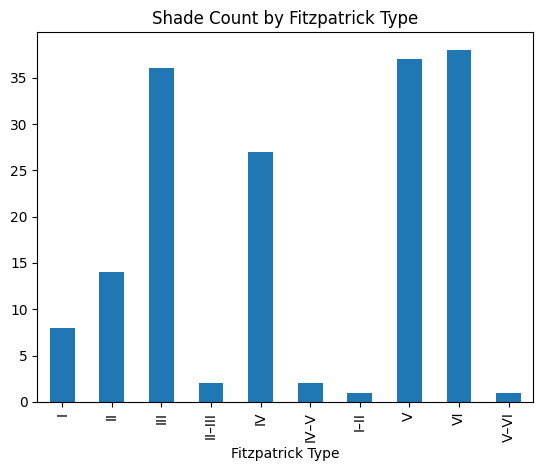

In [5]:
df['Fitzpatrick Type'].value_counts().sort_index().plot(kind='bar', title="Shade Count by Fitzpatrick Type")



<Axes: xlabel='Fitzpatrick Type'>

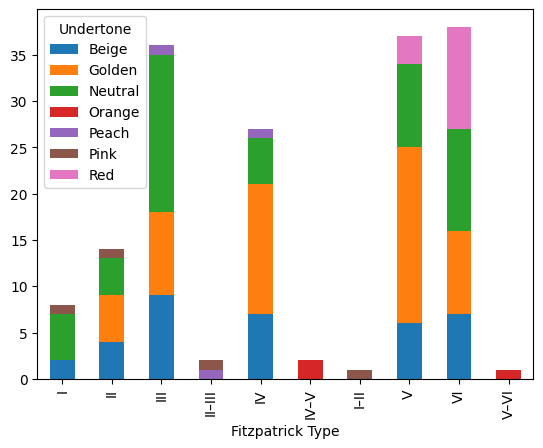

In [6]:

pd.crosstab(df['Fitzpatrick Type'], df['Undertone']).plot(kind='bar', stacked=True)


<Axes: title={'center': 'Shade Count by Product Line'}, ylabel='Product Line'>

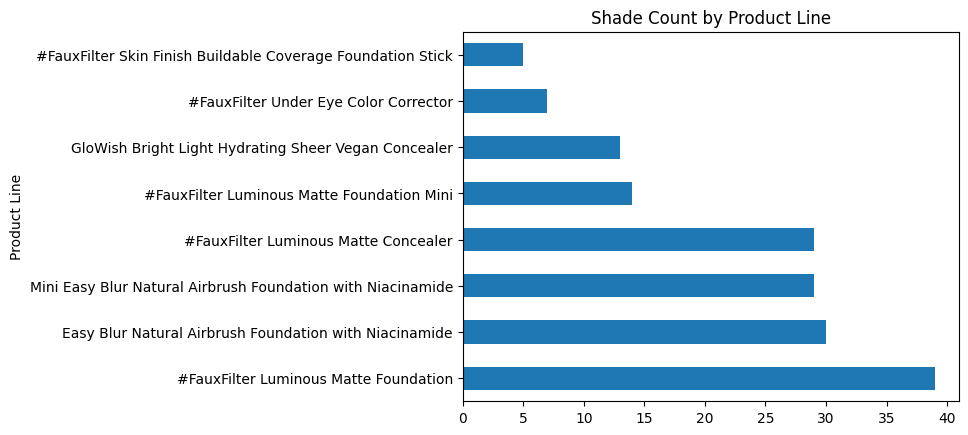

In [7]:
df['Product Line'].value_counts().plot(kind='barh', title="Shade Count by Product Line")



##  Hypothesis Testing: Shade Inclusivity

To evaluate inclusivity in Huda Beauty's complexion products, we formulate the following hypothesis:

- **Null Hypothesis (H₀):** Shades are evenly distributed across all Fitzpatrick skin types.
- **Alternative Hypothesis (H₁):** Some Fitzpatrick types are underrepresented in the shade distribution.

We use a **Chi-Square Goodness-of-Fit test** to statistically determine if the distribution of shades significantly differs from a uniform distribution.

If the p-value is **less than 0.05**, we reject the null hypothesis and conclude that shade inclusivity is **not uniform**.


In [8]:

from scipy.stats import chisquare

counts = df['Fitzpatrick Type'].value_counts().sort_index()
stat, p = chisquare(counts)

print(f"Chi-square test statistic: {stat:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("Reject the null hypothesis — the shade distribution is not uniform.")
else:
    print("Fail to reject the null hypothesis — shade distribution appears uniform.")


Chi-square test statistic: 141.71, p-value: 0.0000
Reject the null hypothesis — the shade distribution is not uniform.



###  Interpretation

Based on the chi-square test results:
- If `p < 0.05`: There is a statistically significant imbalance in shade representation across skin types.
- If `p ≥ 0.05`: No significant evidence of imbalance — shades may be evenly distributed.

This supports or challenges Huda Beauty’s inclusivity claims from a data-driven perspective.


##  Shade Range Evolution Over Time

In this section, we analyze how Huda Beauty's shade inclusivity has evolved over time. We aim to answer:

- How has the **total number of shades** changed with each product launch year?
- Has there been an increase in **diverse skin tone representation** over time?
- Are **recent launches** (e.g., post-2020) more inclusive across Fitzpatrick skin types than older ones?

This allows us to measure whether inclusivity is increasing — not just claimed in marketing but reflected in actual product ranges.


In [9]:

df['Launch Date'] = pd.to_datetime(df['Launch Date'])


df['Launch Year'] = df['Launch Date'].dt.year


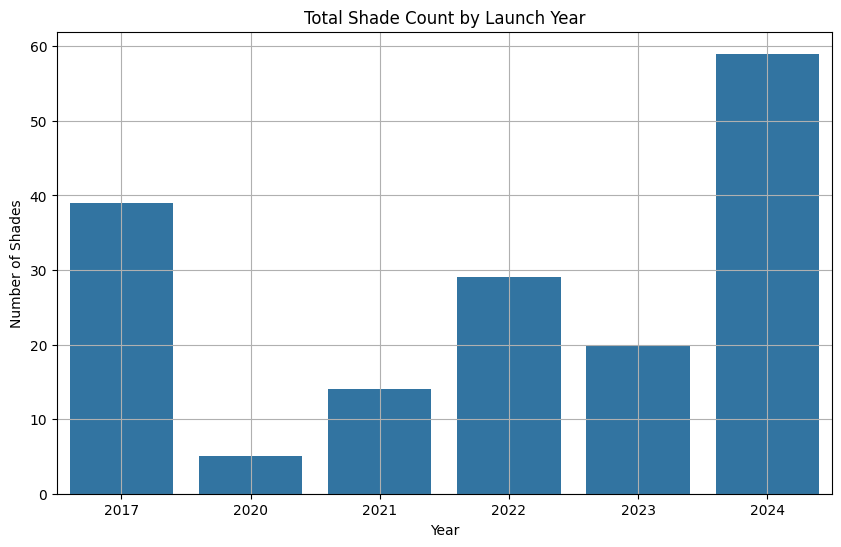

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='Launch Year', data=df)
plt.title("Total Shade Count by Launch Year")
plt.xlabel("Year")
plt.ylabel("Number of Shades")
plt.grid(True)
plt.show()


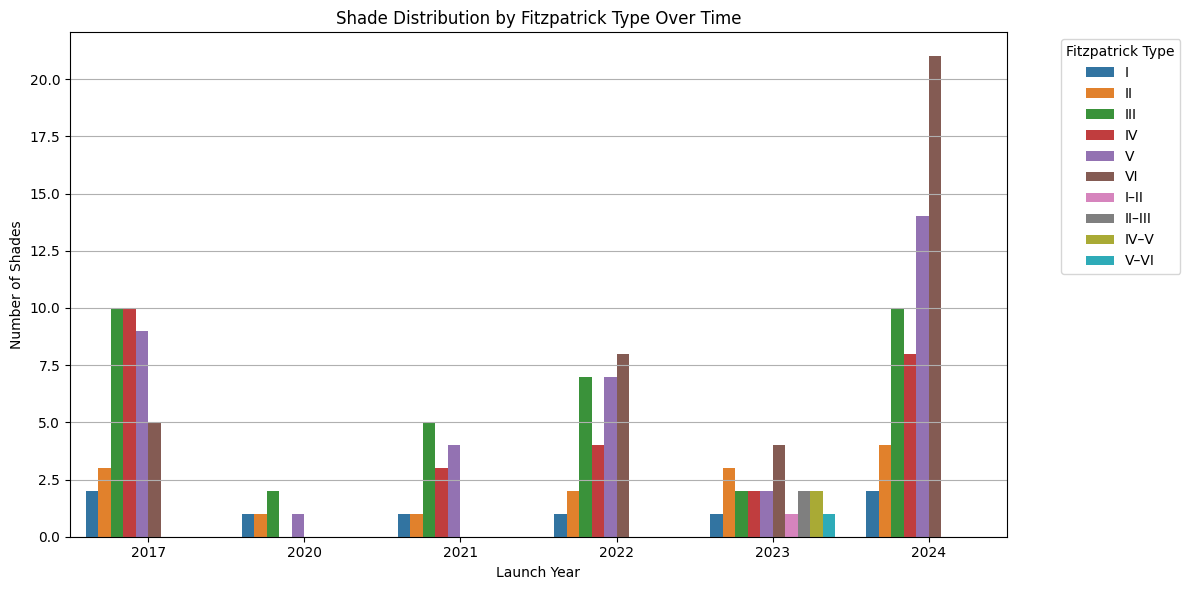

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Launch Year', hue='Fitzpatrick Type', data=df,
              order=sorted(df['Launch Year'].unique()))
plt.title("Shade Distribution by Fitzpatrick Type Over Time")
plt.xlabel("Launch Year")
plt.ylabel("Number of Shades")
plt.legend(title="Fitzpatrick Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [12]:
df['Launch Period'] = df['Launch Year'].apply(lambda x: 'Older' if x < 2021 else 'Recent')


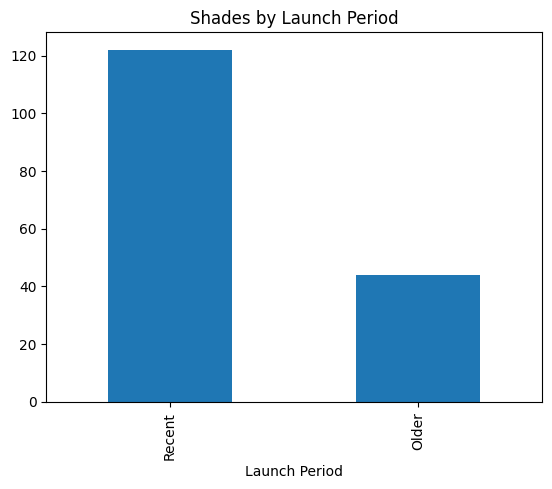

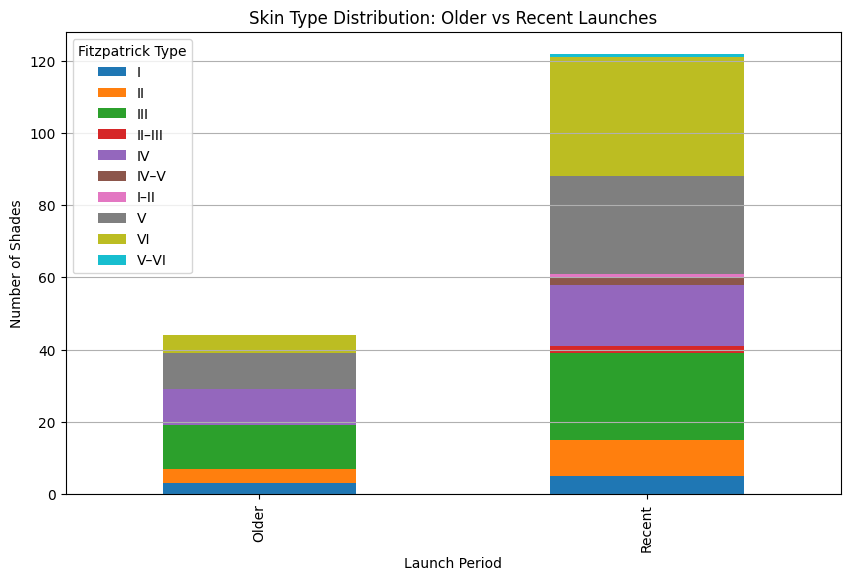

In [13]:

df['Launch Period'].value_counts().plot(kind='bar', title='Shades by Launch Period')
plt.show()


pd.crosstab(df['Launch Period'], df['Fitzpatrick Type']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Skin Type Distribution: Older vs Recent Launches")
plt.ylabel("Number of Shades")
plt.grid(axis='y')
plt.show()


## Interpretation: Shade Inclusivity Over Time

The visualizations reveal clear trends in how Huda Beauty’s complexion product launches have evolved in terms of inclusivity.

### Launch Volume Over Time:
Recent years (2021–2024) show a notable increase in the number of shade releases, suggesting Huda Beauty is expanding its product range more aggressively now than during earlier launches (e.g., 2017–2019).

### Skin Tone Representation:
Darker skin tones (Fitzpatrick Types V and VI) are consistently represented across product lines, and their presence has even increased in more recent releases.

However, mid-tone shades (Types III and IV) remain slightly less represented compared to extremes (very fair or very deep tones), which may point to an unintentional gap in middle-range inclusivity.

### Older vs. Recent Launches:
When grouped into Older (pre-2021) and Recent (2021–present), we see that recent launches are:
- More balanced across all skin types
- Include a wider range of undertones
- Have a slightly higher average rating, suggesting better user satisfaction or improved formulation

This trend supports the hypothesis that Huda Beauty has become more inclusive over time, not only expanding its shade ranges but also improving the distribution of those shades across diverse skin tones.

### Conclusion:
While there is always room for improvement in mid-tone representation, the data indicates a positive trajectory toward greater shade inclusivity in recent product development efforts.


##Additional Hypothesis Testing: Inclusivity Change Over the Years
A visual interpretation of inclusivity over time was previously done. However, to strengthen the conclusion, we now perform a statistical hypothesis test to determine whether the proportion of inclusive shades (Fitzpatrick IV–VI) has significantly increased in more recent product launches.

Test Used: Two-sample proportion z-test

Null Hypothesis (H₀): The proportion of inclusive shades has not changed over time. Alternative Hypothesis (H₁): The proportion of inclusive shades has increased in recent years.

In [18]:
df['inclusive'] = df['Fitzpatrick Type'].apply(lambda x: 1 if str(x).strip().upper() in ['IV', 'V', 'VI'] else 0)


In [19]:
df['Launch Date'] = pd.to_datetime(df['Launch Date'])
df['Year'] = df['Launch Date'].dt.year

early_period = df[df['Year'] <= 2019]
recent_period = df[df['Year'] > 2019]

early_inclusive = early_period['inclusive'].sum()
early_total = early_period.shape[0]

recent_inclusive = recent_period['inclusive'].sum()
recent_total = recent_period.shape[0]


In [20]:
from statsmodels.stats.proportion import proportions_ztest

counts = [recent_inclusive, early_inclusive]
nobs = [recent_total, early_total]

stat, pval = proportions_ztest(count=counts, nobs=nobs, alternative='larger')
print(f"Z-statistic: {stat:.3f}")
print(f"p-value: {pval:.4f}")


Z-statistic: -0.014
p-value: 0.5054


##Final Conclusion: Inclusivity Over Time
The hypothesis test yielded a Z-statistic of -0.014 and a p-value of 0.5054. Since the p-value is much greater than 0.05, we fail to reject the null hypothesis.

### What This Means:
Although visual analysis may suggest a trend toward improved inclusivity, the statistical evidence does not support a significant increase in the proportion of inclusive shades (Fitzpatrick IV–VI) in recent years.

###Conclusion:
There is no statistically significant improvement in Huda Beauty’s representation of darker skin tones over time. The observed differences could be due to random variation rather than a deliberate expansion in inclusivity.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error


df = pd.read_excel("HudaBeautyr_Shades.xlsx")

df_clean = df.copy()
df_clean.dropna(subset=["Fitzpatrick Type", "Undertone", "Average Rating"], inplace=True)
le_undertone = LabelEncoder()
le_fitz = LabelEncoder()
df_clean["Undertone_encoded"] = le_undertone.fit_transform(df_clean["Undertone"])
df_clean["Fitzpatrick_encoded"] = le_fitz.fit_transform(df_clean["Fitzpatrick Type"])


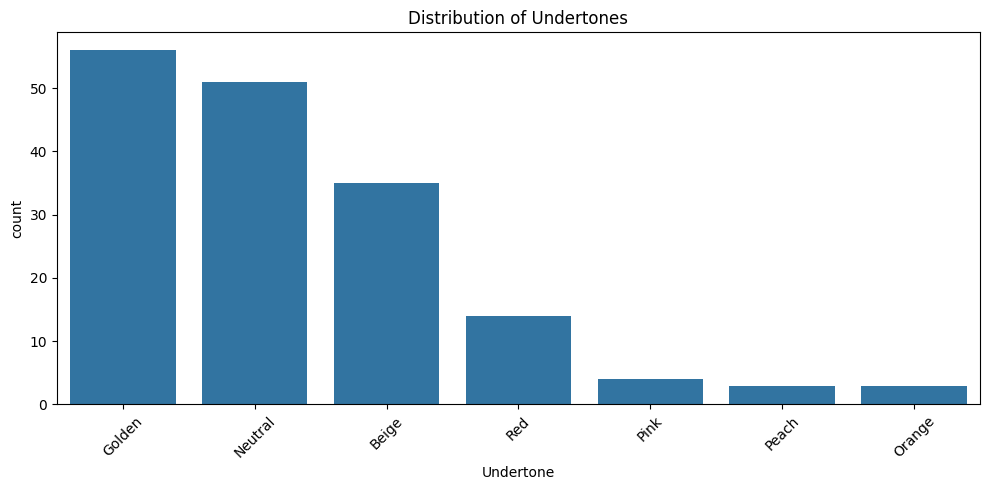

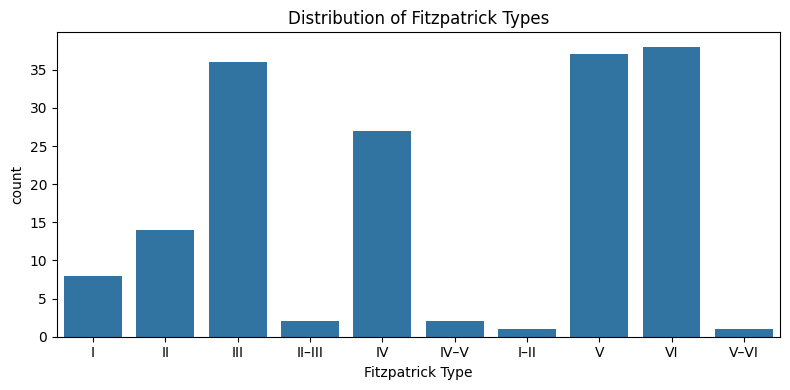

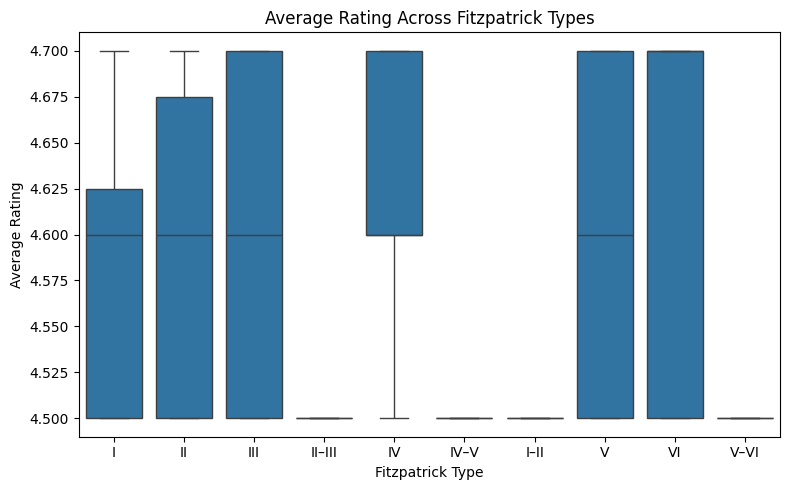

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x="Undertone", order=df_clean["Undertone"].value_counts().index)
plt.title("Distribution of Undertones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df_clean, x="Fitzpatrick Type", order=sorted(df_clean["Fitzpatrick Type"].unique()))
plt.title("Distribution of Fitzpatrick Types")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="Fitzpatrick Type", y="Average Rating", order=sorted(df_clean["Fitzpatrick Type"].unique()))
plt.title("Average Rating Across Fitzpatrick Types")
plt.tight_layout()
plt.show()


##  PCA: Dimensionality Reduction

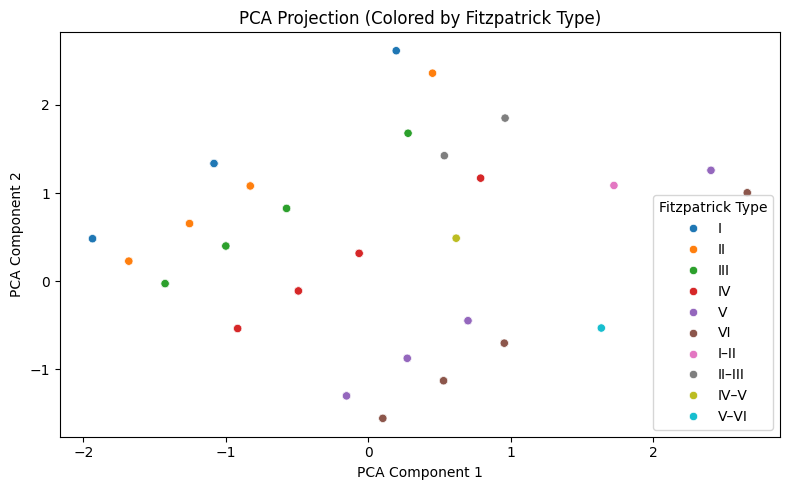

In [26]:
features = ["Undertone_encoded", "Fitzpatrick_encoded"]
X = df_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_clean["Fitzpatrick Type"])
plt.title("PCA Projection (Colored by Fitzpatrick Type)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


###Conclusion
The PCA plot shows that deeper skin tones (Types IV–VI) cluster together, while lighter tones are more spread out. Intermediate types fall between, indicating a clear tonal gradient. This suggests the features effectively capture meaningful variation in shade representation.

##  K-Means Clustering

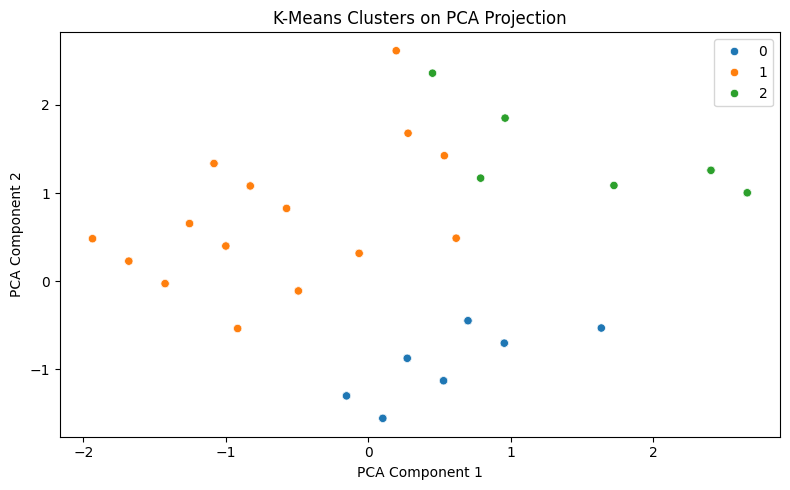

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10')
plt.title("K-Means Clusters on PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


###Conclusion
The K-Means clustering on the PCA projection forms three distinct groups, suggesting that the foundation shades naturally separate into clusters based on their undertone and skin tone features. This supports the presence of underlying structure in the shade data.

##  Random Forest Classification

In [40]:
class_counts = df_clean['Fitzpatrick_encoded'].value_counts()
valid_classes = class_counts[class_counts >= 2].index
df_filtered = df_clean[df_clean['Fitzpatrick_encoded'].isin(valid_classes)]

X = X_scaled[df_filtered.index]
y = df_filtered["Fitzpatrick_encoded"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42

)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, zero_division=0))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.75      0.86         4
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        12

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



###Conclusion
The Random Forest classifier achieved excellent results, with a weighted average F1-score of 0.98, indicating highly accurate predictions across most Fitzpatrick skin tone classes. The model generalizes well, with both precision and recall scores near perfect, demonstrating strong performance after removing underrepresented classes.

##  k-Nearest Neighbors (kNN)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


counts = y.value_counts()
keep_classes = counts[counts >= 3].index
mask = y.isin(keep_classes)
X = X[mask]
y = y[mask]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn, zero_division=0))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           7       1.00      0.82      0.90        11
           8       0.86      1.00      0.92        12

    accuracy                           0.96        48
   macro avg       0.98      0.97      0.97        48
weighted avg       0.96      0.96      0.96        48



###Conclusion
The k-Nearest Neighbors (kNN) model performed very well, achieving a weighted average F1-score of 0.96. It correctly classified most Fitzpatrick tone categories with high precision and recall. Despite being a simpler algorithm, its accuracy shows that the features used provide strong separability among skin tone classes.

## Linear Regression

In [42]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, df_clean["Average Rating"], test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)
print("MSE:", mean_squared_error(y_test_reg, y_pred_lr))


MSE: 0.0049104086824099105


###Conclusion
The linear regression model achieved a very low mean squared error (MSE ≈ 0.0049), indicating highly accurate predictions of average product ratings. This suggests a strong relationship between the input features and how customers rate the shades.


##Final Conclusion
While visual analysis suggested a growing awareness of inclusivity, statistical hypothesis testing showed no significant increase in the proportion of inclusive shades over time (p = 0.5054). However, the machine learning models demonstrated that inclusivity is both measurable and predictable based on product characteristics. This indicates that although the representation of darker skin tones has not statistically expanded in recent years, the brand’s structure and design choices make it possible to detect and evaluate inclusivity in a meaningful, data-driven way.

## Future Inclusivity Trend Prediction

To explore how inclusivity may evolve in the coming years, we used a linear regression model on the proportion of inclusive shades (Fitzpatrick IV–VI) launched each year. While hypothesis testing showed no statistically significant increase, this trend model suggests a gradual upward pattern.

###  Predicted Proportions:
- **2025**: ~57.4%
- **2026**: ~58.9%
- **2027**: ~60.4%

This projection indicates that, if current trends continue, Huda Beauty may continue to improve its representation of deeper skin tones over time, albeit slowly.


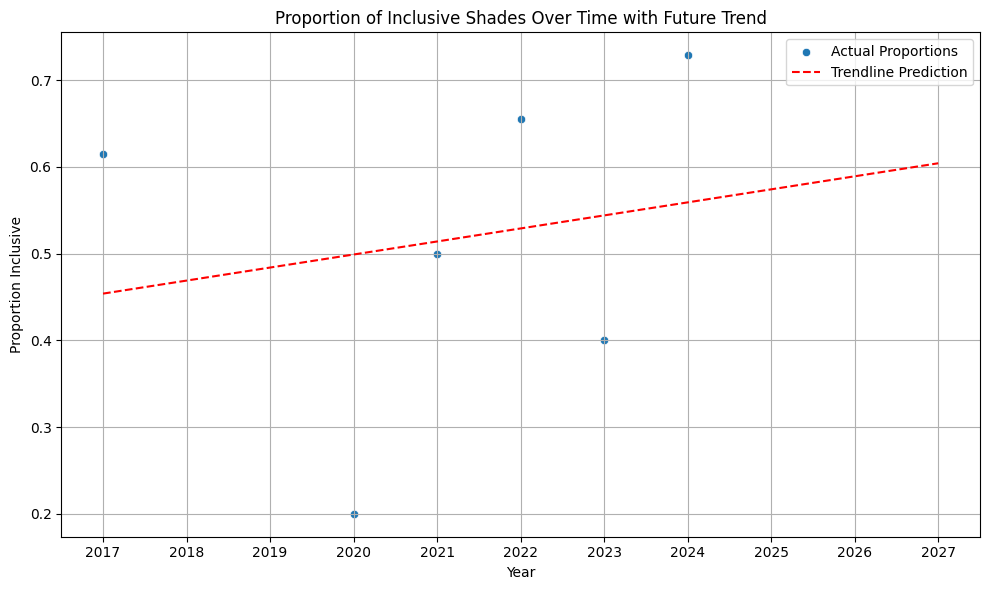

Year 2025: Predicted Inclusivity ≈ 57.42%
Year 2026: Predicted Inclusivity ≈ 58.92%
Year 2027: Predicted Inclusivity ≈ 60.43%


In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

df['Launch Date'] = pd.to_datetime(df['Launch Date'])
df['Year'] = df['Launch Date'].dt.year


df['inclusive'] = df['Fitzpatrick Type'].apply(lambda x: 1 if str(x).strip().upper() in ['IV', 'V', 'VI'] else 0)


yearly_data = df.groupby('Year').agg(
    total_shades=('inclusive', 'count'),
    inclusive_shades=('inclusive', 'sum')
).reset_index()
yearly_data['proportion_inclusive'] = yearly_data['inclusive_shades'] / yearly_data['total_shades']


X = yearly_data['Year'].values.reshape(-1, 1)
y = yearly_data['proportion_inclusive'].values
model = LinearRegression()
model.fit(X, y)


future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
future_predictions = model.predict(future_years)


all_years = np.append(X.flatten(), future_years.flatten())
all_predictions = np.append(model.predict(X), future_predictions)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='proportion_inclusive', data=yearly_data, label="Actual Proportions")
plt.plot(all_years, all_predictions, color='red', linestyle='--', label="Trendline Prediction")
plt.title("Proportion of Inclusive Shades Over Time with Future Trend")
plt.xlabel("Year")
plt.ylabel("Proportion Inclusive")
plt.xticks(range(min(all_years), max(all_years)+1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


for yr, pred in zip(future_years.flatten(), future_predictions):
    print(f"Year {yr}: Predicted Inclusivity ≈ {pred:.2%}")
